# Installing tf2

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 42kB/s 
     |████████████████████████████████| 3.8MB 42.9MB/s 
     |████████████████████████████████| 450kB 55.4MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


# Developing Conv model for Fashion MNIST

* Import Fashion MNIST from keras.datasets
* Loading data into variables
* Normalizing data
* Data reshaping into a 4d tensor to account for channels
* Model definition
  - Data flattening will be done here as part of the model
* Model compilation
* Model summary check
* Model fitting
* Model predicition





In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
train_images = train_images/255
test_images = test_images/255

In [0]:
train_images = train_images.reshape(60000,28,28,-1)
test_images = test_images.reshape(10000,28,28,-1)

In [0]:
model = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(input_shape=()),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.4533 - accuracy: 0.8345
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3041 - accuracy: 0.8882
Epoch 3/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2604 - accuracy: 0.9037
Epoch 4/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2272 - accuracy: 0.9150
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2014 - accuracy: 0.9243


In [36]:
model.evaluate(test_images,test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2721482435822487, 0.9038]

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# Visualising Convolutions

In [39]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [0]:
import matplotlib.pyplot as plt
from keras import models
import numpy as np

In [44]:
model.layers[0].output

<tf.Tensor 'conv2d_8/Identity:0' shape=(None, 26, 26, 64) dtype=float32>

In [47]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_8/Identity:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_9/Identity:0' shape=(None, 11, 11, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_8/Identity:0' shape=(None, 5, 5, 32) dtype=float32>,
 <tf.Tensor 'flatten_3/Identity:0' shape=(None, 800) dtype=float32>,
 <tf.Tensor 'dense_6/Identity:0' shape=(None, 256) dtype=float32>,
 <tf.Tensor 'dense_7/Identity:0' shape=(None, 10) dtype=float32>]

This model is created by defining the model input and the layer wise output configuration in a list format. This activation model can then be used to get access to the output of each intermediate layer, which can then be plotted or played with as per the user's convenience.

In [0]:
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

### Helpful to understand working of functional api on tf2

Init signature: keras.models.Model(*args, **kwargs)
Docstring:     
`Model` groups layers into an object with training and inference features.

There are two ways to instantiate a `Model`:

1 - With the "functional API", where you start from `Input`,
you chain layer calls to specify the model's forward pass,
and finally you create your model from inputs and outputs:

```python
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
```

2 - By subclassing the `Model` class: in that case, you should define your
layers in `__init__` and you should implement the model's forward pass
in `call`.

```python
import tensorflow as tf

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)

  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)

model = MyModel()
```

If you subclass `Model`, you can optionally have
a `training` argument (boolean) in `call`, which you can use to specify
a different behavior in training and inference:

```python
import tensorflow as tf

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

model = MyModel()

In [62]:
model.input

<tf.Tensor 'conv2d_8_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [0]:
keras.models.Model?

In [61]:
activation_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2050

A run through of the activation model

In [75]:
op = activation_model.predict(test_images[0].reshape(1,28,28,1))

for i in range(len(op)):
  print(op[i].shape)

(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 11, 11, 32)
(1, 5, 5, 32)
(1, 800)
(1, 256)
(1, 10)


## Visualisations plot using plt.subplots

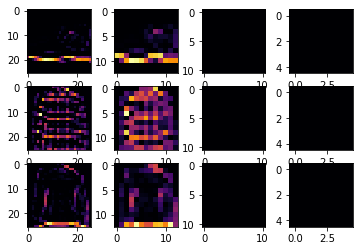

In [76]:
fig,ax = plt.subplots(3,4)
image_f = 0
image_s = 7
image_t = 26
conv_i = 1

for x in range(0,4):

  """The specific output for each image at specific points in the forward pass process, where the output for that specific layer is picked,  
    and a specific convolution/pooling (can be observed due to the diminishing size) output is being plotted out of the number of filters."""

  f1 = activation_model.predict(test_images[image_f].reshape(1, 28, 28, 1))[x]
  ax[0,x].imshow(f1[0, : , :, conv_i], cmap='inferno')
  ax[0,x].grid(False)

  f2 = activation_model.predict(test_images[image_s].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, conv_i], cmap='inferno')
  ax[1,x].grid(False)

  f3 = activation_model.predict(test_images[image_t].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, conv_i], cmap='inferno')
  ax[2,x].grid(False)